In [1]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos

In [2]:
X = pnd.read_csv('incidenciaMunicipal_FINAL.csv')
X.head()

,Unnamed: 0,CVE_ENT,CVE_MUN,CVE_MOD,CVE_TIPO,CVE_SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_DELITOS,VIVIENDA_ENDUTIH
0,0,1,1,6,15,16,4,3,0,7,4,6,4,3,4,1,4,7,43,2
1,1,1,1,6,15,17,9,10,10,11,11,6,10,18,8,3,14,14,115,2
2,2,1,1,6,15,18,4,1,5,3,0,1,1,4,2,5,6,4,32,2
3,3,1,1,6,15,19,0,0,0,0,1,0,0,0,0,0,1,0,2,2
4,4,1,1,6,15,20,34,32,46,44,49,34,49,56,34,24,49,32,449,2


In [3]:
X.drop('Unnamed: 0',1,inplace=True)

In [4]:
X.head()

,CVE_ENT,CVE_MUN,CVE_MOD,CVE_TIPO,CVE_SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE,TOTAL_DELITOS,VIVIENDA_ENDUTIH
0,1,1,6,15,16,4,3,0,7,4,6,4,3,4,1,4,7,43,2
1,1,1,6,15,17,9,10,10,11,11,6,10,18,8,3,14,14,115,2
2,1,1,6,15,18,4,1,5,3,0,1,1,4,2,5,6,4,32,2
3,1,1,6,15,19,0,0,0,0,1,0,0,0,0,0,1,0,2,2
4,1,1,6,15,20,34,32,46,44,49,34,49,56,34,24,49,32,449,2


In [7]:
y = X['TOTAL_DELITOS']
y.head()

0     43
1    115
2     32
3      2
4    449
Name: TOTAL_DELITOS, dtype: int64

In [11]:
X = X[X.columns.difference(['TOTAL_DELITOS'])]
X.head()

,ABRIL,AGOSTO,CVE_ENT,CVE_MOD,CVE_MUN,CVE_SUBTIPO,CVE_TIPO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE,VIVIENDA_ENDUTIH
0,7,3,1,6,1,16,15,7,4,3,4,6,0,4,4,1,4,2
1,11,18,1,6,1,17,15,14,9,10,10,6,10,11,14,3,8,2
2,3,4,1,6,1,18,15,4,4,1,1,1,5,0,6,5,2,2
3,0,0,1,6,1,19,15,0,0,0,0,0,0,1,1,0,0,2
4,44,56,1,6,1,20,15,32,34,32,49,34,46,49,49,24,34,2


In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(42926, 18)

In [19]:
X_test.shape

(10732, 18)

In [20]:
y_train.shape

(42926,)

In [21]:
y_test.shape

(10732,)

## Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

In [24]:
clf_gNB = GaussianNB()
clf_gNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [60]:
X_train.head(6)

,ABRIL,AGOSTO,CVE_ENT,CVE_MOD,CVE_MUN,CVE_SUBTIPO,CVE_TIPO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE,VIVIENDA_ENDUTIH
32560,0,0,21,9,140,26,16,0,0,0,0,0,0,0,0,0,0,3
1635,1,0,4,2,11,10,7,0,1,0,0,0,3,0,1,0,0,2
15671,0,0,13,8,62,24,15,0,0,0,0,0,0,0,0,0,0,3
20944,0,0,15,9,57,26,16,0,0,0,0,0,0,0,0,0,0,3
8407,0,0,9,9,7,10,16,0,0,0,0,0,0,0,0,0,0,1
47834,0,0,30,2,133,9,7,0,0,0,0,0,0,0,0,0,0,3


In [61]:
y_train.head(6)

32560    0
1635     5
15671    0
20944    0
8407     0
47834    0
Name: TOTAL_DELITOS, dtype: int64

## Predicciones

In [57]:
y_pred = clf_gNB.predict(X_train.head(6))
y_pred

array([0, 4, 0, 0, 0, 0])

## linear model regression

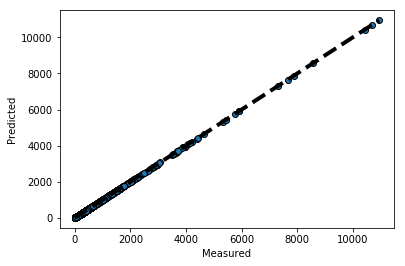

In [66]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_train, y_train)

fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()